# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns

## Reading the data file provided

In [5]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [6]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## Appending the column with Annual Salary by multiplying the fortnightly income by 26

In [7]:
df['Annual Salary'] = df[df['movement']=='credit']['amount']*26

In [8]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Annual Salary
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,NaN
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,NaN
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,NaN
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,NaN
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,NaN


## Calculating a new DataFrame with Account wise Annual Salary

In [9]:
acc_wise = df.groupby('account', as_index=False).mean()

In [10]:
acc_wise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
account              100 non-null object
card_present_flag    100 non-null float64
merchant_code        100 non-null float64
balance              100 non-null float64
age                  100 non-null int64
amount               100 non-null float64
Annual Salary        100 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.2+ KB


In [11]:
acc_wise.drop(['card_present_flag','merchant_code','balance','age','amount'], axis=1, inplace=True)

In [12]:
acc_wise.head()

,account,Annual Salary
0,ACC-1037050564,23194.34
1,ACC-1056639002,83070.26
2,ACC-1199531521,98430.28
3,ACC-1217063613,126454.12
4,ACC-1222300524,26055.38


## Merging the two DataFrames on Account column

In [13]:
df = df.merge(acc_wise, on='account', how='right')

In [14]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Annual Salary_x,Annual Salary_y
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,NaN,26355.42
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,NaN,26355.42
2,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,NaN,26355.42
3,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,f2ef6270-cf91-409f-a6a2-fbd6735ea500,NaN,Diana,...,NSW,2018-08-01T08:09:42.000+0000,14.10,1c12c9ad77894ef8b507fb091e41e928,Australia,CUS-2487424745,153.6 -28.63,debit,NaN,26355.42
4,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,NaN,2018-08-01T14:00:00.000+0000,1013.67,a72c9dd8b4614a1982ff71f8b62677ad,Australia,CUS-2487424745,NaN,credit,26355.42,26355.42


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 25 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [16]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
Annual Salary_x      11160
Annual Salary_y          0
dtype: int64

In [17]:
df.drop(['bpay_biller_code','merchant_code','Annual Salary_x'], axis=1, inplace=True)

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12040
Data columns (total 22 columns):
status               7717 non-null object
card_present_flag    7717 non-null float64
account              7717 non-null object
currency             7717 non-null object
long_lat             7717 non-null object
txn_description      7717 non-null object
merchant_id          7717 non-null object
first_name           7717 non-null object
balance              7717 non-null float64
date                 7717 non-null datetime64[ns]
gender               7717 non-null object
age                  7717 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           7717 non-null object
amount               7717 non-null float64
transaction_id       7717 non-null object
country              7717 non-null object
customer_id          7717 non-null object
merchant_long_lat    7717 non-null object
movement             7717 non-null object


In [20]:
df.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement', 'Annual Salary_y'],
      dtype='object')

In [21]:
df.nunique()

status                  1
card_present_flag       2
account               100
currency                1
long_lat              100
txn_description         2
merchant_id          5725
first_name             80
balance              7698
date                   91
gender                  2
age                    33
merchant_suburb      1609
merchant_state          8
extraction           7717
amount               4157
transaction_id       7717
country                 1
customer_id           100
merchant_long_lat    2703
movement                1
Annual Salary_y       100
dtype: int64

In [22]:
df.drop(['status','currency','country','merchant_id','first_name','merchant_suburb','extraction','transaction_id','customer_id','movement'], axis=1, inplace=True)

In [23]:
df.head()

,card_present_flag,account,long_lat,txn_description,balance,date,gender,age,merchant_state,amount,merchant_long_lat,Annual Salary_y
0,1.0,ACC-1598451071,153.41 -27.95,POS,35.39,2018-08-01,F,26,QLD,16.25,153.38 -27.99,26355.42
1,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,21.20,2018-08-01,F,26,NSW,14.19,151.21 -33.87,26355.42
2,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,17.95,2018-08-01,F,26,QLD,3.25,153.44 -28.06,26355.42
3,1.0,ACC-1598451071,153.41 -27.95,POS,3.85,2018-08-01,F,26,NSW,14.10,153.6 -28.63,26355.42
5,1.0,ACC-1598451071,153.41 -27.95,POS,1006.85,2018-08-01,F,26,QLD,10.67,153.41 -28.01,26355.42


In [24]:
df = pd.get_dummies(df, columns=['txn_description','gender','merchant_state'], drop_first=True)

In [25]:
df.head()

,card_present_flag,account,long_lat,balance,date,age,amount,merchant_long_lat,Annual Salary_y,txn_description_SALES-POS,gender_M,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA
0,1.0,ACC-1598451071,153.41 -27.95,35.39,2018-08-01,26,16.25,153.38 -27.99,26355.42,0,0,0,0,1,0,0,0,0
1,0.0,ACC-1598451071,153.41 -27.95,21.20,2018-08-01,26,14.19,151.21 -33.87,26355.42,1,0,1,0,0,0,0,0,0
2,1.0,ACC-1598451071,153.41 -27.95,17.95,2018-08-01,26,3.25,153.44 -28.06,26355.42,1,0,0,0,1,0,0,0,0
3,1.0,ACC-1598451071,153.41 -27.95,3.85,2018-08-01,26,14.10,153.6 -28.63,26355.42,0,0,1,0,0,0,0,0,0
5,1.0,ACC-1598451071,153.41 -27.95,1006.85,2018-08-01,26,10.67,153.41 -28.01,26355.42,0,0,0,0,1,0,0,0,0


## Scatter plot between Annual Salary and the Amount Spent by the customers with colors depicting Male and Female customers

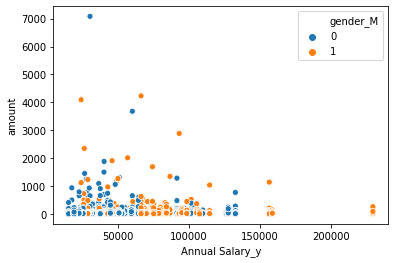

In [26]:
sns.scatterplot(x = df['Annual Salary_y'], y = df['amount'], hue=df['gender_M'])

In [27]:
df.corr()

,card_present_flag,balance,age,amount,Annual Salary_y,txn_description_SALES-POS,gender_M,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA
card_present_flag,1.000000,0.005925,-0.008405,-0.002074,-0.003898,0.007425,-0.001427,-0.020957,0.004977,0.013866,-0.003027,0.018883,0.006239,-0.007365
balance,0.005925,1.000000,0.149160,0.030800,0.271210,0.000003,0.056767,-0.058266,-0.040214,-0.092382,-0.006609,-0.001596,0.184888,-0.032958
age,-0.008405,0.149160,1.000000,0.026577,-0.098658,-0.003349,-0.007601,-0.013957,-0.051709,-0.007359,0.021203,0.041493,0.130290,-0.142521
amount,-0.002074,0.030800,0.026577,1.000000,0.004361,-0.001660,0.007138,0.028723,0.005042,-0.019392,0.000432,-0.007103,0.003901,-0.025178
Annual Salary_y,-0.003898,0.271210,-0.098658,0.004361,1.000000,-0.002055,0.191307,-0.001315,0.073371,-0.049869,0.054396,0.053411,-0.042500,0.021115
txn_description_SALES-POS,0.007425,0.000003,-0.003349,-0.001660,-0.002055,1.000000,0.014404,-0.006759,-0.015323,0.005670,0.000505,0.020344,-0.000202,-0.000565
gender_M,-0.001427,0.056767,-0.007601,0.007138,0.191307,0.014404,1.000000,0.060816,-0.156988,-0.013755,-0.042868,0.050002,0.086063,-0.078951
merchant_state_NSW,-0.020957,-0.058266,-0.013957,0.028723,-0.001315,-0.006759,0.060816,1.000000,-0.103291,-0.314225,-0.149061,-0.058954,-0.386192,-0.254934
merchant_state_NT,0.004977,-0.040214,-0.051709,0.005042,0.073371,-0.015323,-0.156988,-0.103291,1.000000,-0.083019,-0.039382,-0.015576,-0.102033,-0.067354
merchant_state_QLD,0.013866,-0.092382,-0.007359,-0.019392,-0.049869,0.005670,-0.013755,-0.314225,-0.083019,1.000000,-0.119807,-0.047384,-0.310399,-0.204901


## Heatmap plot of the correlations on the dataframe DF. As we can see, Annual Salary has maximum correlations with balance and gender

(14, 0)

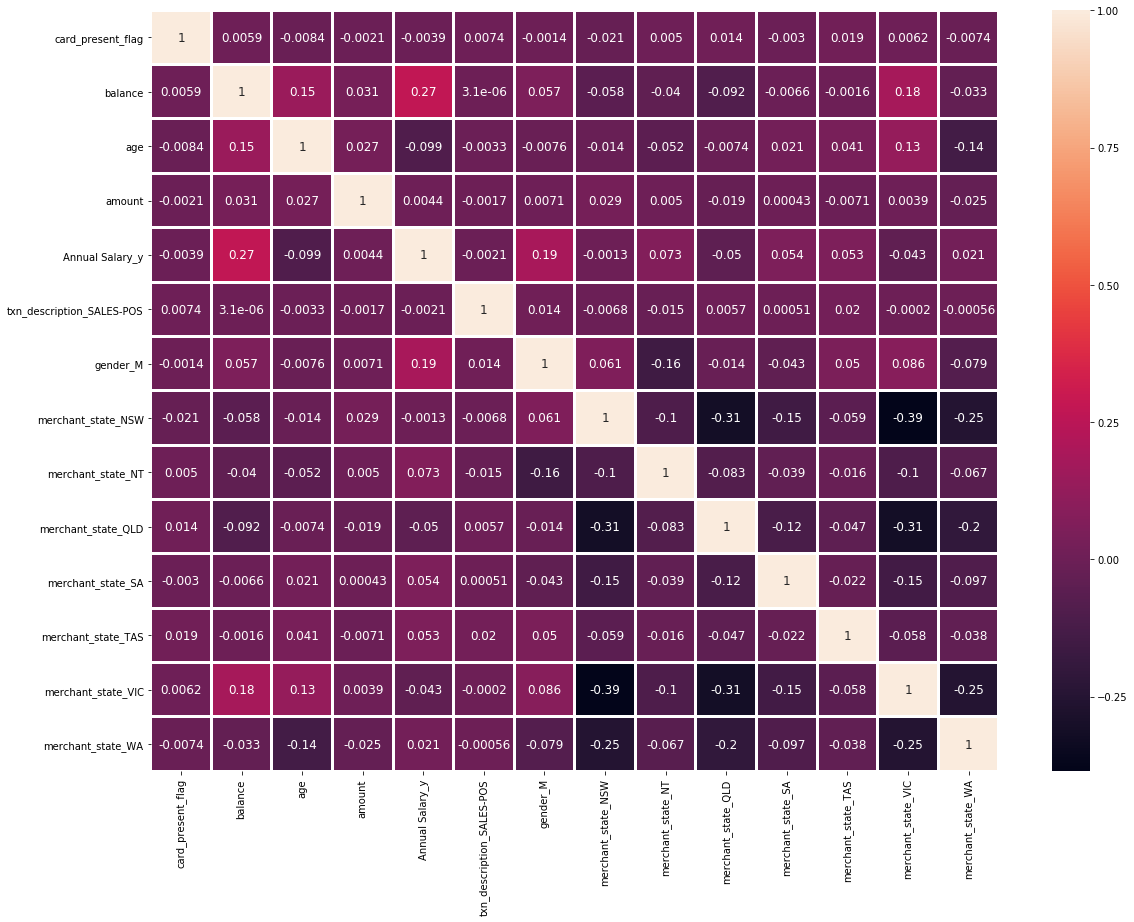

In [28]:
plt.figure(figsize=(19,14))
ax = sns.heatmap(df.corr(), annot=True, annot_kws={'size':12}, linewidths=2)
ax.set_ylim(14,0)

In [29]:
df.head()

,card_present_flag,account,long_lat,balance,date,age,amount,merchant_long_lat,Annual Salary_y,txn_description_SALES-POS,gender_M,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA
0,1.0,ACC-1598451071,153.41 -27.95,35.39,2018-08-01,26,16.25,153.38 -27.99,26355.42,0,0,0,0,1,0,0,0,0
1,0.0,ACC-1598451071,153.41 -27.95,21.20,2018-08-01,26,14.19,151.21 -33.87,26355.42,1,0,1,0,0,0,0,0,0
2,1.0,ACC-1598451071,153.41 -27.95,17.95,2018-08-01,26,3.25,153.44 -28.06,26355.42,1,0,0,0,1,0,0,0,0
3,1.0,ACC-1598451071,153.41 -27.95,3.85,2018-08-01,26,14.10,153.6 -28.63,26355.42,0,0,1,0,0,0,0,0,0
5,1.0,ACC-1598451071,153.41 -27.95,1006.85,2018-08-01,26,10.67,153.41 -28.01,26355.42,0,0,0,0,1,0,0,0,0


In [30]:
X = df.iloc[:,[3,5,6]].values
y = df.iloc[:,8].values

In [31]:
X

array([[3.539000e+01, 2.600000e+01, 1.625000e+01],
       [2.120000e+01, 2.600000e+01, 1.419000e+01],
       [1.795000e+01, 2.600000e+01, 3.250000e+00],
       ...,
       [2.054009e+04, 2.900000e+01, 1.693000e+01],
       [2.052469e+04, 2.900000e+01, 1.540000e+01],
       [2.487066e+04, 2.900000e+01, 1.633000e+01]])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Importing the Linear Regression model to train our model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred = lr.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mean_squared_error(y_test,y_pred)

1177229249.156644

## Importing the Decision Tree Regressor to train our model

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dtr = DecisionTreeRegressor()

In [42]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [43]:
y_pred2 = dtr.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(y_test, y_pred2)

370303283.82168776

In [46]:
dtr.predict([[35,16,30000]])

array([39979.68])

In [47]:
lr.predict([[35,16,30000]])

array([92116.48985256])

### As we can see from the Mean Squared Error metric for the two regressors, Decision Tree regressor gives better results with lower errors as compared to the Linear regression model